### IMPORTS

---





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

### DATASET

---



In [2]:
dataset = pd.read_csv("spam.csv",
                      encoding="latin1")

In [3]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# get rid of unneccessary columns
dataset.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"],
          axis=1,
          inplace=True)

In [5]:
dataset.columns = ["labels", "text"]

In [6]:
dataset.head()

,labels,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# change labels
data_labels = dataset["labels"].values
data_labels[data_labels == "spam"] = 1
data_labels[data_labels == "ham"] = 0

In [8]:
dataset.head()

,labels,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
dataset["labels"].value_counts()

0    4825
1     747
Name: labels, dtype: int64

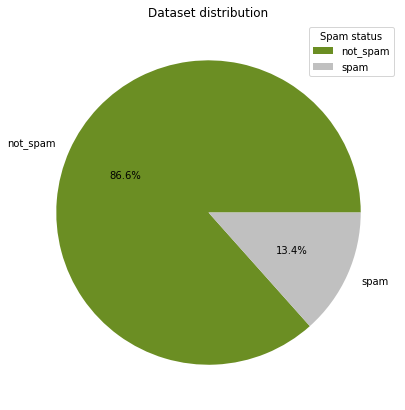

In [10]:
# check if the dataset is balanced
labels = ["not_spam", "spam"]
colors = ["olivedrab", "silver"]

plt.figure(figsize=(7,7))
plt.pie(dataset["labels"].value_counts(), labels=labels, colors=colors, autopct="%1.1f%%")
plt.legend(title = "Spam status")
plt.title("Dataset distribution")
plt.show()

### DATA PREPROCESSING

---



In [11]:
X = dataset["text"]
y = dataset["labels"]

In [12]:
X.shape

(5572,)

In [13]:
y.shape

(5572,)

**EMBEDDING**

---



In [14]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [15]:
embedded_data = tokenizer.texts_to_sequences(X)

**PADDING**

---



In [16]:
from keras.preprocessing.sequence import pad_sequences

# pad to the longest item in the dataset
max_length = max([len(text) for text in X])

X = pad_sequences(embedded_data,
                  value=0,
                  padding="post",
                  maxlen=max_length)

In [17]:
X[:5]

array([[  50,  469, 4410, ...,    0,    0,    0],
       [  46,  336, 1495, ...,    0,    0,    0],
       [  47,  486,    8, ...,    0,    0,    0],
       [   6,  245,  152, ...,    0,    0,    0],
       [1018,    1,   98, ...,    0,    0,    0]])

### TRAIN/TEST/VALIDATION SPLIT

---



In [18]:
from sklearn.model_selection import train_test_split
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size = 0.2)

In [19]:
# second split for the validation set
X_valid, X_test, y_valid, y_test = train_test_split(X_remaining, y_remaining, test_size = 0.5)

In [20]:
X_train[:5]

array([[  30,   25,  189, ...,    0,    0,    0],
       [ 161,   39, 1921, ...,    0,    0,    0],
       [ 161,   31,    5, ...,    0,    0,    0],
       [ 720,  707,  227, ...,    0,    0,    0],
       [  13,  330,  119, ...,    0,    0,    0]])

In [21]:
X_test[:5]

array([[   5, 6660,  477, ...,    0,    0,    0],
       [   1,  136,  916, ...,    0,    0,    0],
       [  74,   15,  288, ...,    0,    0,    0],
       [1837,  355,   21, ...,    0,    0,    0],
       [2847,    7, 1781, ...,    0,    0,    0]])

In [22]:
X_valid[:5]

array([[ 45,  22,   3, ...,   0,   0,   0],
       [ 10, 134, 372, ...,   0,   0,   0],
       [ 28,   1, 106, ...,   0,   0,   0],
       [ 53,   6, 875, ...,   0,   0,   0],
       [123,  83, 106, ...,   0,   0,   0]])

In [23]:
y_valid[:5]

4505    0
1079    0
2170    0
3060    0
2037    0
Name: labels, dtype: object

In [24]:
y_train[:5]

4767    0
3398    0
2785    0
414     1
1466    0
Name: labels, dtype: object

In [25]:
y_test[:5]

2793    0
1973    0
2406    0
1705    0
5517    0
Name: labels, dtype: object

### RANDOM FOREST

**MODEL CONFIGURATION**

---



In [26]:
from sklearn.ensemble import RandomForestClassifier

RF_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')

**MODEL TRAINING**

---



In [35]:
# fixes some errors
y_train = np.array(y_train, dtype=float)
y_valid = np.array(y_valid, dtype=float)
y_test = np.array(y_test, dtype=float)

In [36]:
RF_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

**MODEL EVALUATION**

---



In [37]:
y_pred = RF_classifier.predict(X_test)

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96       488
         1.0       0.89      0.56      0.68        70

    accuracy                           0.94       558
   macro avg       0.91      0.77      0.82       558
weighted avg       0.93      0.94      0.93       558



**NEW PREDICTIONS**

---



In [39]:
my_message = ["hi r u lookin 4 saucy fun wiv busty woman am free sex chat now +491574546387"]

In [40]:
def preprocess(text):
  text = tokenizer.texts_to_sequences(text)
  text = pad_sequences(text,
                      value=0,
                      padding="post",
                      maxlen=max_length)
  return text

In [41]:
new_message = preprocess(my_message)

In [42]:
output = RF_classifier.predict(new_message)

def prediction(output):
   if output[0] == 1:
     return "spam"
   else:
     return "not_spam"

In [43]:
# so wrong
prediction(output)

'not_spam'

### RECURRENT NEURAL NETWORK

**MODEL CONFIGURATION**

---



In [44]:
from keras.models import Sequential
from keras.layers import Input, Embedding, LSTM, GlobalMaxPool1D, Dense, Dropout, BatchNormalization

In [45]:
INPUT_SHAPE = X_train.shape[1]
VOCABULARY_SIZE = len(tokenizer.word_index)
EMBEDDING_DIMENSION = 20
LSTM_UNITS = 15

In [46]:
rnn = Sequential()

rnn.add(Input(INPUT_SHAPE,))
# +1 here resolves the indexing problem during training
rnn.add(Embedding(VOCABULARY_SIZE+1, EMBEDDING_DIMENSION))

rnn.add(LSTM(LSTM_UNITS, return_sequences=True))

rnn.add(GlobalMaxPool1D())

rnn.add(Dense(units=1, activation="sigmoid"))

In [47]:
rnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [48]:
rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 910, 20)           178420    
                                                                 
 lstm (LSTM)                 (None, 910, 15)           2160      
                                                                 
 global_max_pooling1d (Globa  (None, 15)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 16        
                                                                 
Total params: 180,596
Trainable params: 180,596
Non-trainable params: 0
_________________________________________________________________


**MODEL TRAINING**

---



In [49]:
BATCH_SIZE = 32
EPOCHS = 5

In [50]:
rnn.fit(X_train, y_train, epochs=EPOCHS, validation_data=(X_valid, y_valid), batch_size=BATCH_SIZE)

Epoch 1/5
140/140 [==============================] - 16s 110ms/step - loss: 0.4911 - accuracy: 0.8452 - val_loss: 0.3281 - val_accuracy: 0.8564
Epoch 2/5
140/140 [==============================] - 15s 109ms/step - loss: 0.2266 - accuracy: 0.9226 - val_loss: 0.1455 - val_accuracy: 0.9677
Epoch 3/5
140/140 [==============================] - 15s 107ms/step - loss: 0.0942 - accuracy: 0.9856 - val_loss: 0.0905 - val_accuracy: 0.9749
Epoch 4/5
140/140 [==============================] - 15s 106ms/step - loss: 0.0508 - accuracy: 0.9942 - val_loss: 0.0770 - val_accuracy: 0.9749
Epoch 5/5
140/140 [==============================] - 15s 106ms/step - loss: 0.0309 - accuracy: 0.9955 - val_loss: 0.0683 - val_accuracy: 0.9767


**MODEL EVALUATION**

---



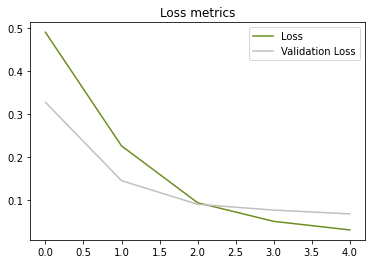

In [52]:
plt.plot(rnn.history.history["loss"], label="Loss", color=colors[0])
plt.plot(rnn.history.history["val_loss"], label="Validation Loss", color=colors[1])
plt.title("Loss metrics")
plt.legend()
plt.show()

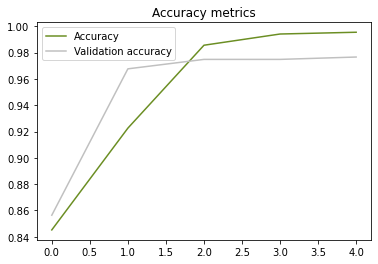

In [53]:
plt.plot(rnn.history.history["accuracy"], label="Accuracy", color=colors[0])
plt.plot(rnn.history.history["val_accuracy"], label="Validation accuracy", color=colors[1])
plt.title("Accuracy metrics")
plt.legend()
plt.show()

In [54]:
rnn.evaluate(X_test, y_test, verbose=1)

18/18 - 0s - loss: 0.0537 - accuracy: 0.9857 - 429ms/epoch - 24ms/step


[0.05373460426926613, 0.9856630563735962]

In [ ]:
rnn.save('saved_model/spam_model')

In [ ]:
#rnn = tf.keras.models.load_model('saved_model/spam_model')

**NEW PREDICTIONS**

---



In [56]:
output = rnn.predict(new_message)

In [57]:
def prediction(output):
   if output[0][0] > 0.5:
     return "spam"
   else:
     return "not_spam"

In [58]:
prediction(output)

'spam'